In [1]:
import numpy as np

In [2]:
# Day 1
data = np.loadtxt('day1.txt')
print(np.sum(data[1:] > data[:-1]))
#print(np.sum(np.diff(data) > 0))
#print(np.sum(np.diff(data[0:-2] + data[1:-1] + data[2:]) > 0))
print(np.sum(data[3:] > data[:-3]))

1521
1543


In [3]:
# Day 2
pos = [0,0]
with open('day2.txt', 'r') as f:
    for line in f:
        direction, distance = line.split(' ')
        if direction[0] == 'f':
            pos[0] += int(distance)
        elif direction[0] == 'u':
            pos[1] -= int(distance)
        else:
            pos[1] += int(distance)
print(pos[0]*pos[1])

pos = [0,0]
aim = 0
with open('day2.txt', 'r') as f:
    for line in f:
        direction, distance = line.split(' ')
        d = int(distance)
        if direction[0] == 'f':
            pos[0] += d
            pos[1] += aim*d
        elif direction[0] == 'u':
            aim -= d
        else:
            aim += d
print(pos[0]*pos[1])


2215080
1864715580


In [4]:
# Day 3
data = np.loadtxt('day3.txt', converters={0:lambda s: [c for c in s]}, dtype=np.chararray) - 48
tmp = data.sum(0)/data.shape[0] + 0.5 + 1e-16
tmp = tmp.astype(int)
gamma = ''.join([str(t) for t in tmp])
#print(tmp.dot(2**np.arange(tmp.shape[0] - 1, -1, -1)))
#print(int(gamma, 2))
epsilon = ''.join([str(int(not t)) for t in tmp])
print(int(gamma, 2)*int(epsilon, 2))

mask1 = np.ones(data.shape[0], dtype=bool)
for j in range(data.shape[1]):
    N_most_common = np.sum(mask1)
    if N_most_common <= 1:
        break
    most_common  = int(np.sum(data[mask1,j])/N_most_common + 0.5 + 1e-16)
    mask1 &= (data[:,j] == most_common)

mask2 = np.ones(data.shape[0], dtype=bool)
for j in range(data.shape[1]):
    N_least_common = np.sum(mask2)
    if N_least_common <= 1:
        break
    least_common = int(np.sum(data[mask2,j])/N_least_common + 0.5 + 1e-16)
    mask2 &= mask2 & (data[:,j] != least_common)
    
oxygen = ''.join([str(t) for t in data[mask1, :][0]])
co2scrubber = ''.join([str(t) for t in data[mask2, :][0]])
print(int(oxygen, 2)*int(co2scrubber, 2))


1307354
482500


In [5]:
# Day 4
class BingoBoard:
    def __init__(self, bingo_array):
        self.bingo_array = bingo_array
        self.marked = np.zeros(bingo_array.shape, dtype=bool)
        self.sum = np.sum(bingo_array)
        self.done = False
    
    def mark_number(self, value):
        col_list, row_list = np.where(self.bingo_array == value)
        if len(col_list > 0):
            col, row = col_list[0], row_list[0]
            self.marked[col, row] = True
            self.sum -= value
            if np.all(self.marked[:,row]) or np.all(self.marked[col, :]):
                self.done = True
                return self.sum*value
        return 0
    
with open('day4.txt', 'r') as f:
    for line in f:
        numbers = [int(s) for s in line.split(',')]
        break

A = np.loadtxt('day4.txt', skiprows=1, dtype=int)
bingo_plates = [BingoBoard(A[5*i:5*(i + 1), :]) for i in range(100)]

winners = []
for num in numbers:
    for index, b in enumerate(bingo_plates):
        if b.done:
            continue
        tmp = b.mark_number(num)
        if tmp > 0:
            winners.append((index, tmp))

            
print(winners[0], winners[-1])


(71, 49860) (22, 24628)


4745
18442


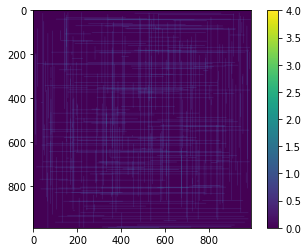

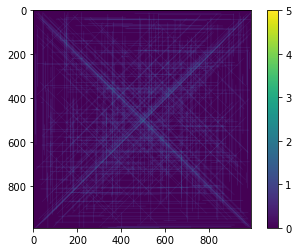

In [6]:
# Day 5
import matplotlib.pyplot as plt
points = []
with open('day5.txt', 'r') as f:
    for line in f:
        points.append([int(u) for u in line.replace('->',',').split(',')])
points_array = np.array(points)
xmax0 = max(np.max(points_array[:,0]), np.max(points_array[:,2]))
ymax0 = max(np.max(points_array[:,1]), np.max(points_array[:,3]))

my_map = np.zeros((xmax0 + 1, ymax0 + 1), dtype=int)
for x1, y1, x2, y2 in points_array:
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    if (xmin != xmax) and (ymin == ymax):
        my_map[xmin:xmax + 1, ymin] += 1
    elif (xmin == xmax) and (ymin != ymax):
        my_map[xmin, ymin:ymax + 1] += 1
print(np.sum([my_map > 1]))
plt.imshow(my_map)
plt.colorbar()

my_map = np.zeros((xmax0 + 1, ymax0 + 1), dtype=int)
for x1, y1, x2, y2 in points_array:
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    xdir = np.sign(x2 - x1) 
    ydir = np.sign(y2 - y1)
    vx = np.arange(xmax - xmin + 1)
    vy = np.arange(ymax - ymin + 1)
    my_map[x1 + xdir*vx, y1 + ydir*vy] += 1
    
plt.figure()
plt.imshow(my_map)
plt.colorbar()

print(np.sum([my_map > 1]))

In [7]:
# Day 6
data = np.loadtxt('day6.txt', delimiter=',', dtype=int)
n = 9
population = np.zeros(n, dtype=int)
for age, count in zip(*np.unique(data, return_counts=True)):
    population[age] = count

index_start = 0
for days in range(256):
    population[(index_start + 7) % n] += population[index_start]
    index_start = (index_start + 1) % n
    if days == 79 or days == 255:
        print(np.sum(population))

380758
1710623015163


In [29]:
# Day 7
#data = np.array([16,1,2,0,4,2,7,1,2,14])
data = np.loadtxt('day7.txt', delimiter=',', dtype=int)
pos, count = np.unique(data, return_counts=True)
fuel_cost = [np.sum(np.abs(pos - j)*count) for j in range(pos[0], pos[-1] + 1)]
print(np.min(fuel_cost))

cost = lambda d:d*(d+1)//2
fuel_cost = [np.sum(cost(np.abs(pos - j))*count) for j in range(pos[0], pos[-1] + 1)]
print(np.min(fuel_cost))

329389
86397080


In [27]:
n = 19
print(np.sum(range(n + 1)))
print(n*(n+1)//2)

190
190
